Zipporah Mutua-KPSK-deKUT-02-34
✅ Maize Pest and Disease Invasion 

Goal: Predict maize pest invasion levels based on weather data.
Method: Train machine learning models using simulated weather and pest severity data.

Inputs: Max/min temperature, rainfall, humidity, wind speed.
Outputs: Risk levels (Low, Moderate, High) for:
Fall Armyworm
Maize Ear Rot
Maize Stem Borer

Use Case: Early warning for farmers and agronomists to make informed pest control decisions.

Tech Stack: Python, Scikit-learn, Streamlit (for web interface).

In [105]:
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tensorflow import keras
from tensorflow.keras import layers
#import shap
import seaborn as sns

In [113]:
def generate_synthetic_data(n=1200):
    data = []
    for _ in range(n):
        temp_max = np.random.uniform(25, 40)
        temp_min = np.random.uniform(15, 30)
        rainfall = np.random.uniform(0, 20)
        humidity = np.random.uniform(30, 90)
        wind_speed = np.random.uniform(0.5, 10)
        soil_moisture = np.random.uniform(10, 50)
        ndvi = np.random.uniform(0.1, 0.9)
        altitude = np.random.uniform(100, 2500)

        # More realistic logic per pest
        fall_risk = "High" if humidity > 70 and rainfall > 5 else "Medium" if humidity > 50 else "Low"
        ear_rot_risk = "High" if temp_min < 18 and rainfall > 10 and ndvi < 0.4 else "Medium" if rainfall > 8 else "Low"
        stem_borer_risk = "High" if temp_max > 35 and wind_speed > 4 and altitude < 1500 else "Medium" if temp_max > 30 else "Low"

        data.append([
            temp_max, temp_min, rainfall, humidity, wind_speed,
            soil_moisture, ndvi, altitude,
            fall_risk, ear_rot_risk, stem_borer_risk
        ])
    
    columns = [
        "temp_max", "temp_min", "rainfall", "humidity", "wind_speed",
        "soil_moisture", "ndvi", "altitude",
        "fall_armyworm_risk", "ear_rot_risk", "stem_borer_risk"
    ]
    return pd.DataFrame(data, columns=columns)
data.to_csv('climate_data.csv', index=False)
df = generate_synthetic_data()
df.head()


,temp_max,temp_min,rainfall,humidity,wind_speed,soil_moisture,ndvi,altitude,fall_armyworm_risk,ear_rot_risk,stem_borer_risk
0,34.880394,26.843755,10.566668,78.601752,5.795911,15.176172,0.822757,144.657879,High,Medium,Medium
1,26.374279,29.843990,14.253888,57.400783,5.628421,14.546555,0.513838,635.424262,Medium,Medium,Low
2,31.433616,20.540454,6.920408,48.388472,4.416327,32.430003,0.434617,1708.812409,Low,Low,Medium
3,33.433588,20.208585,15.971202,31.956518,6.780529,29.558569,0.615068,1342.081968,Low,Medium,Medium
4,25.610189,21.508216,2.408383,65.751749,1.327325,29.658926,0.317227,728.931843,Medium,Low,Low


C:\Users\Administrator\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


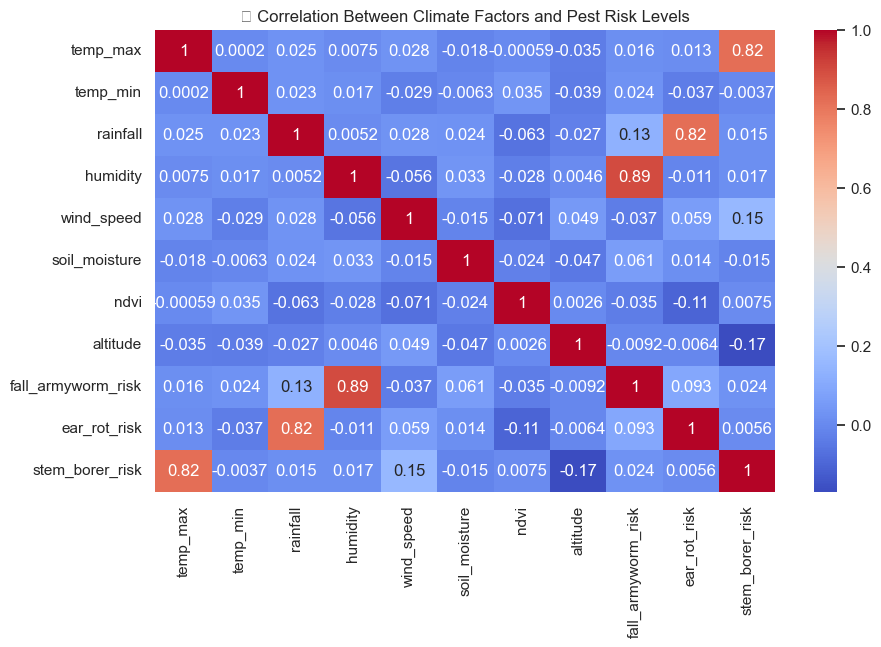

In [107]:
# Convert labels to numeric for correlation
df_corr = df.copy()
df_corr["fall_armyworm_risk"] = df_corr["fall_armyworm_risk"].map({"Low": 0, "Medium": 1, "High": 2})
df_corr["ear_rot_risk"] = df_corr["ear_rot_risk"].map({"Low": 0, "Medium": 1, "High": 2})
df_corr["stem_borer_risk"] = df_corr["stem_borer_risk"].map({"Low": 0, "Medium": 1, "High": 2})

plt.figure(figsize=(10, 6))
sns.heatmap(df_corr.corr(), annot=True, cmap="coolwarm")
plt.title("🔍 Correlation Between Climate Factors and Pest Risk Levels")
plt.show()

In [116]:
df_avg = df.groupby('fall_armyworm_risk')[[
    'temp_max', 'temp_min', 'rainfall', 'humidity',
    'wind_speed', 'soil_moisture', 'ndvi', 'altitude'
]].mean().reset_index()

df_avg.rename(columns={'fall_armyworm_risk': 'Risk Level'}, inplace=True)


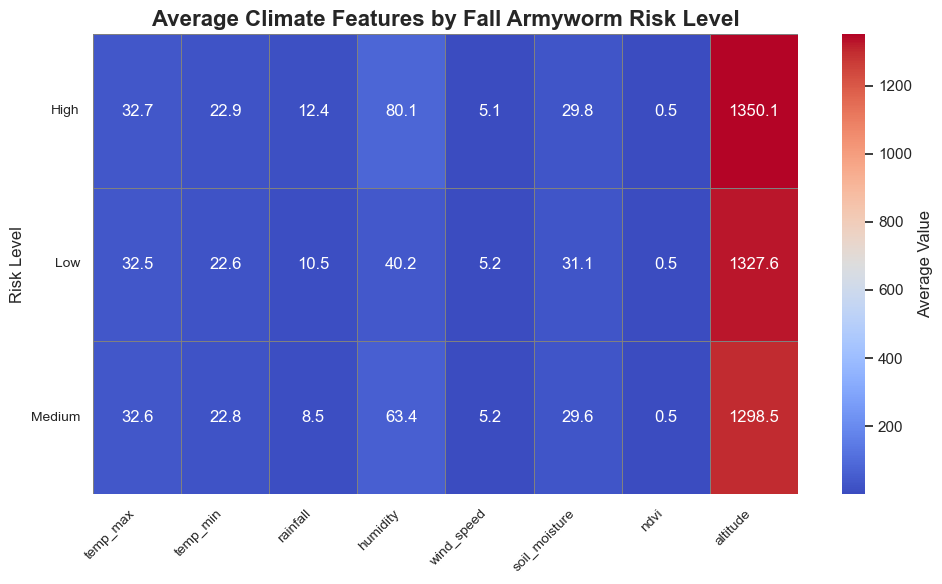

In [121]:
plt.figure(figsize=(10, 6))  # Wider plot
sns.heatmap(
    df_avg.set_index('Risk Level'),
    annot=True,
    fmt=".1f",
    cmap='coolwarm',
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={'label': 'Average Value'}
)
plt.title("Average Climate Features by Fall Armyworm Risk Level", fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()


In [87]:
# Prepare data
features = ["temp_max", "temp_min", "rainfall", "humidity", "wind_speed",
            "soil_moisture", "ndvi", "altitude"]
X = df[features].values
y_fall = df["fall_armyworm_risk"]

In [88]:
# Encode target
le_fall = LabelEncoder()
y_encoded = le_fall.fit_transform(y_fall)

# Convert to categorical
y_cat = keras.utils.to_categorical(y_encoded)

In [89]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, random_state=42)

# Build model
model_fall = keras.Sequential([
    layers.Input(shape=(8,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(3, activation='softmax')  # 3 risk levels: Low, Medium, High
])

In [90]:
model_fall.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train
history = model_fall.fit(X_train, y_train, epochs=30, validation_split=0.2, verbose=1)

Epoch 1/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.4562 - loss: 82.8279 - val_accuracy: 0.3906 - val_loss: 36.5479
Epoch 2/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4189 - loss: 39.1992 - val_accuracy: 0.4010 - val_loss: 21.7584
Epoch 3/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4769 - loss: 21.3796 - val_accuracy: 0.4948 - val_loss: 7.1503
Epoch 4/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5046 - loss: 5.9031 - val_accuracy: 0.4688 - val_loss: 2.1730
Epoch 5/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4789 - loss: 2.1269 - val_accuracy: 0.5521 - val_loss: 1.3585
Epoch 6/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5424 - loss: 1.0834 - val_accuracy: 0.5260 - val_loss: 0.9900
Epoch 7/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6046 - loss: 0.8493 - val_accuracy: 0.6406 - val_loss: 0.7764
Epoch 8/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6160 - loss: 0.8133 - val_accuracy: 0.6406 - val

In [91]:
# Save model & encoder
model_fall.save("model_fall_armyworm.keras")
joblib.dump(le_fall, "encoder_fall_keras.pkl")

['encoder_fall_keras.pkl']

In [92]:
y_ear = df["ear_rot_risk"]

le_ear = LabelEncoder()
y_ear_enc = le_ear.fit_transform(y_ear)
y_ear_cat = keras.utils.to_categorical(y_ear_enc)

Xe_train, Xe_test, ye_train, ye_test = train_test_split(X, y_ear_cat, test_size=0.2, random_state=42)

model_ear = keras.Sequential([
    layers.Input(shape=(8,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(3, activation='softmax')
])

model_ear.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_ear.fit(Xe_train, ye_train, epochs=30, validation_split=0.2, verbose=1)


Epoch 1/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.1808 - loss: 87.5795 - val_accuracy: 0.5260 - val_loss: 8.5295
Epoch 2/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5575 - loss: 6.2921 - val_accuracy: 0.5208 - val_loss: 6.3963
Epoch 3/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6010 - loss: 4.4488 - val_accuracy: 0.5833 - val_loss: 4.7489
Epoch 4/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6495 - loss: 2.8732 - val_accuracy: 0.6719 - val_loss: 3.1133
Epoch 5/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7115 - loss: 2.1825 - val_accuracy: 0.6771 - val_loss: 1.6380
Epoch 6/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7162 - loss: 0.8914 - val_accuracy: 0.6979 - val_loss: 0.7677
Epoch 7/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7658 - loss: 0.6398 - val_accuracy: 0.7188 - val_loss: 0.7037
Epoch 8/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7479 - loss: 0.6937 - val_accuracy: 0.6198 - val_lo

In [93]:
# Save model and encoder
model_ear.save("model_ear_rot.keras")
joblib.dump(le_ear, "encoder_ear_keras.pkl")

['encoder_ear_keras.pkl']

In [94]:
y_stem = df["stem_borer_risk"]

le_stem = LabelEncoder()
y_stem_enc = le_stem.fit_transform(y_stem)
y_stem_cat = keras.utils.to_categorical(y_stem_enc)

Xs_train, Xs_test, ys_train, ys_test = train_test_split(X, y_stem_cat, test_size=0.2, random_state=42)

model_stem = keras.Sequential([
    layers.Input(shape=(8,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(3, activation='softmax')
])

model_stem.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_stem.fit(Xs_train, ys_train, epochs=30, validation_split=0.2, verbose=1)

Epoch 1/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.1658 - loss: 168.4549 - val_accuracy: 0.2865 - val_loss: 43.3004
Epoch 2/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3368 - loss: 25.9335 - val_accuracy: 0.3958 - val_loss: 7.4561
Epoch 3/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4304 - loss: 7.2354 - val_accuracy: 0.4115 - val_loss: 3.8811
Epoch 4/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3966 - loss: 3.3668 - val_accuracy: 0.3906 - val_loss: 1.8574
Epoch 5/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4059 - loss: 2.1330 - val_accuracy: 0.3490 - val_loss: 1.7558
Epoch 6/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3966 - loss: 1.7019 - val_accuracy: 0.4219 - val_loss: 1.2848
Epoch 7/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4365 - loss: 1.5194 - val_accuracy: 0.5156 - val_loss: 1.1315
Epoch 8/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5032 - loss: 1.0891 - val_accuracy: 0.4635 - val_

In [95]:
# Save model and encoder
model_stem.save("model_stem_borer.keras")
joblib.dump(le_stem, "encoder_stem_keras.pkl")

['encoder_stem_keras.pkl']

In [122]:
!pip show tensorflow

Name: tensorflow
Version: 2.19.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: C:\Users\Administrator\anaconda3\Lib\site-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, termcolor, typing-extensions, wrapt
Required-by: 
